### Setup Environment:

In [1]:
from src.data_analysis import show_random_images, show_missing, plot_categorical_columns, plot_continuous, get_image_statistics_df, plot_image_statistics, calculate_normalization_values
from src.get_dataset import get_dataset
from ydata_profiling import ProfileReport

import os
import pandas as pd

In [2]:
# Constants:
DATASET = 'data/'
DOWNLOAD = False

## Metadata:

#### Read csv file:

In [3]:
df = get_dataset("data/", download=DOWNLOAD, info=True)
df.rename(columns={'age': 'patient_age'}, inplace=True)
df.rename(columns={'sex': 'patient_sex'}, inplace=True)

loading csv file in data//labels.csv
Number of Rows: 5164
Number of Columns: 24
Column Names: patient, age, sex, dm_time, insulin, insulin_time, oraltreatment_dm, systemic_hypertension, insurance, educational_level, alcohol_consumption, smoking, obesity, vascular_disease, acute_myocardial_infarction, nephropathy, neuropathy, diabetic_foot, file, laterality, final_artifacts, final_quality, final_icdr, final_edema

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5164 entries, 0 to 5163
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient                      5164 non-null   int64  
 1   age                          5164 non-null   object 
 2   sex                          5164 non-null   int64  
 3   dm_time                      5108 non-null   float64
 4   insulin                      5116 non-null   float64
 5   insulin_time                 1016 non-null   float64
 6   o

In [4]:
df.head()

patient patient_age  patient_sex  dm_time  insulin  insulin_time  \
0        1          58            1     15.0      1.0           NaN   
1        1          58            1     15.0      1.0           NaN   
2        1          58            1     15.0      1.0           NaN   
3        1          58            1     15.0      1.0           NaN   
4       10          63            0      7.0      0.0           NaN   

   oraltreatment_dm  systemic_hypertension  insurance  educational_level  ...  \
0               1.0                    1.0        0.0                3.0  ...   
1               1.0                    1.0        0.0                3.0  ...   
2               1.0                    1.0        0.0                3.0  ...   
3               1.0                    1.0        0.0                3.0  ...   
4               1.0                    1.0        0.0                2.0  ...   

   nephropathy  neuropathy  diabetic_foot      file  laterality  \
0          1.0         0.0            0.0   1.1.jpg       right   
1          1.0         0.0            0.0   1.2.jpg       right   
2          1.0         0.0            0.0   1.3.jpg        left   
3          1.0         0.0            0.0   1.4.jpg        left   
4          0.0         0.0            0.0  10.1.jpg       right   

   final_artifacts  final_quality  final_icdr final_edema normality  
0              yes            yes         4.0          no  abnormal  
1              yes            yes         4.0          no  abnormal  
2              yes            yes         4.0          no  abnormal  
3              yes            yes         4.0          no  abnormal  
4              yes            yes         0.0          no  abnormal  

[5 rows x 25 columns]

#### Missing Values

17 columns with missing values detected:
dm_time 1.08 % missing values
insulin 0.9299999999999999 % missing values
insulin_time 80.33 % missing values
oraltreatment_dm 0.8500000000000001 % missing values
systemic_hypertension 0.8500000000000001 % missing values
insurance 0.9299999999999999 % missing values
educational_level 1.01 % missing values
alcohol_consumption 1.47 % missing values
smoking 1.7000000000000002 % missing values
obesity 1.47 % missing values
vascular_disease 1.47 % missing values
acute_myocardial_infarction 1.63 % missing values
nephropathy 1.55 % missing values
neuropathy 1.47 % missing values
diabetic_foot 2.09 % missing values
final_icdr 5.42 % missing values
final_edema 5.13 % missing values


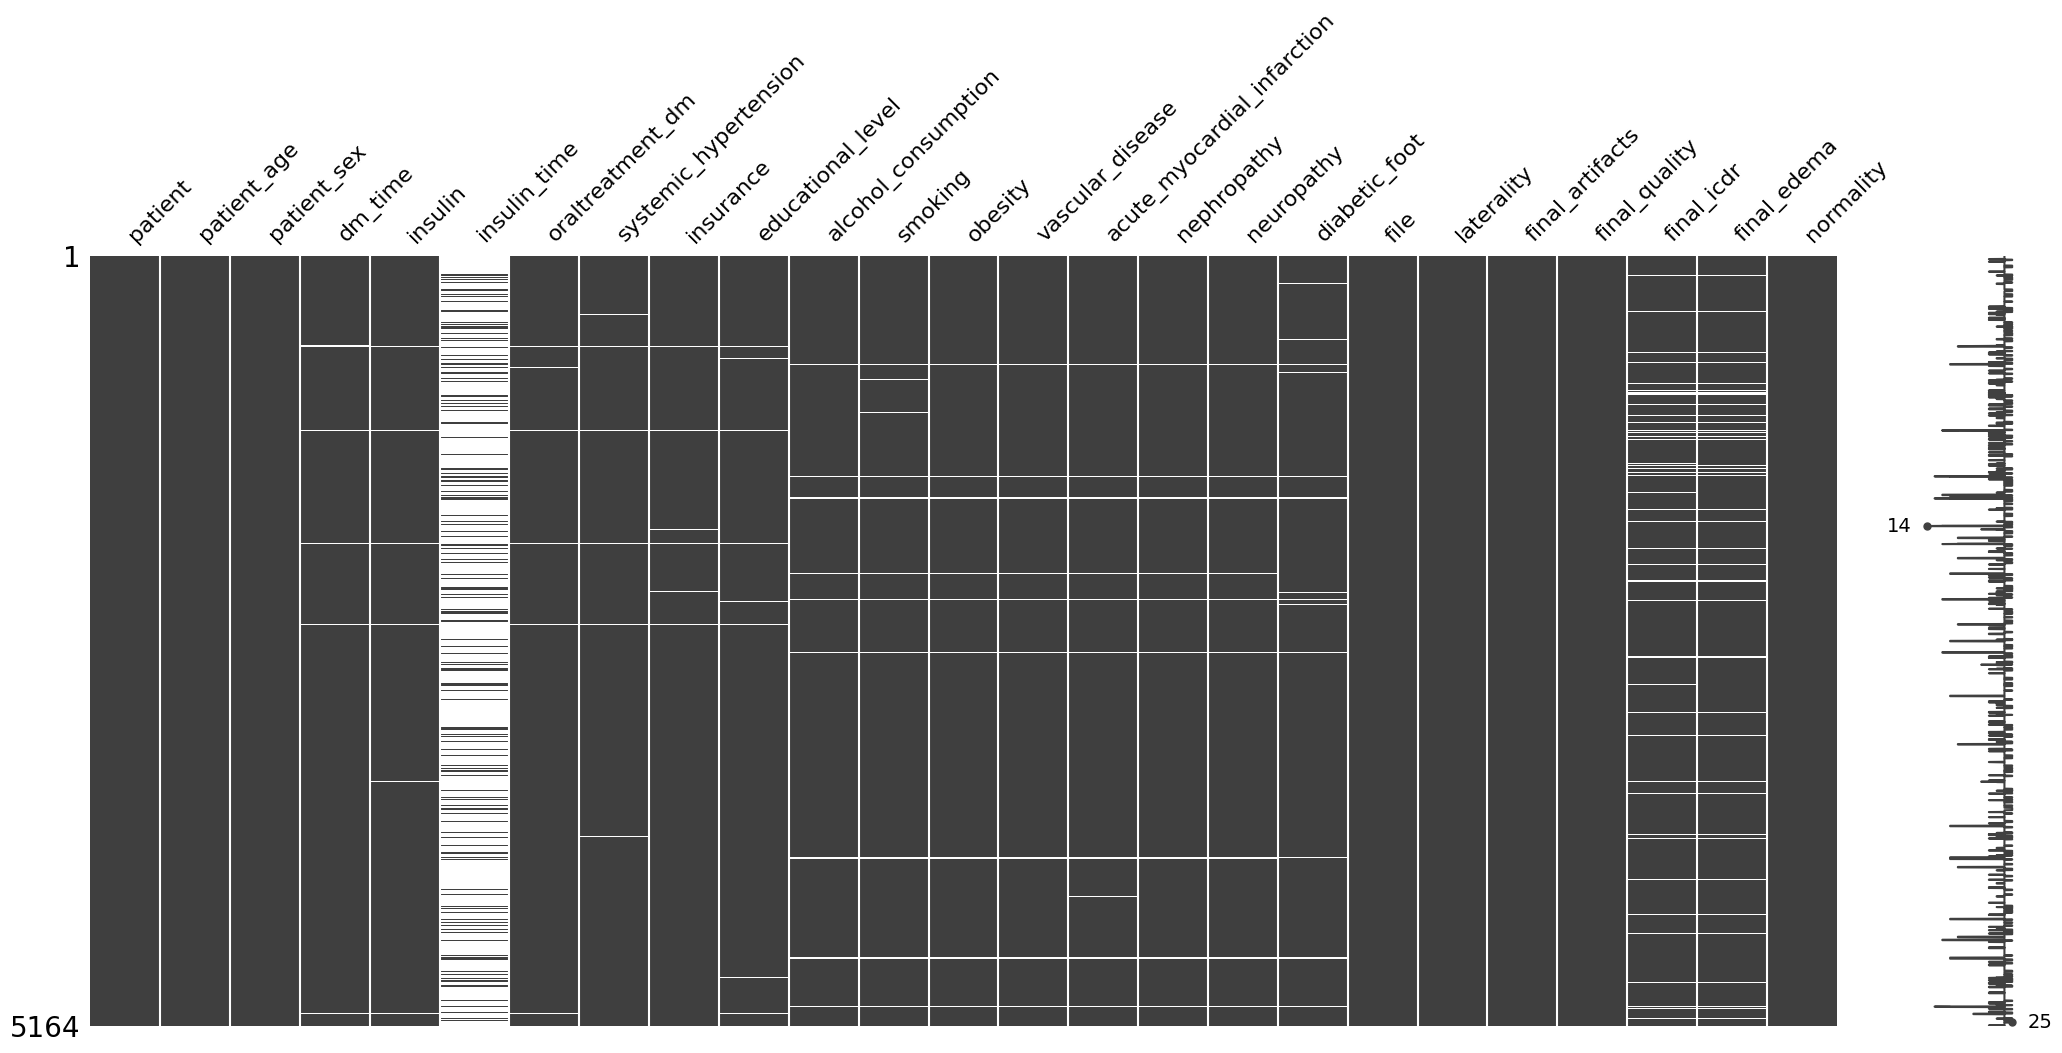

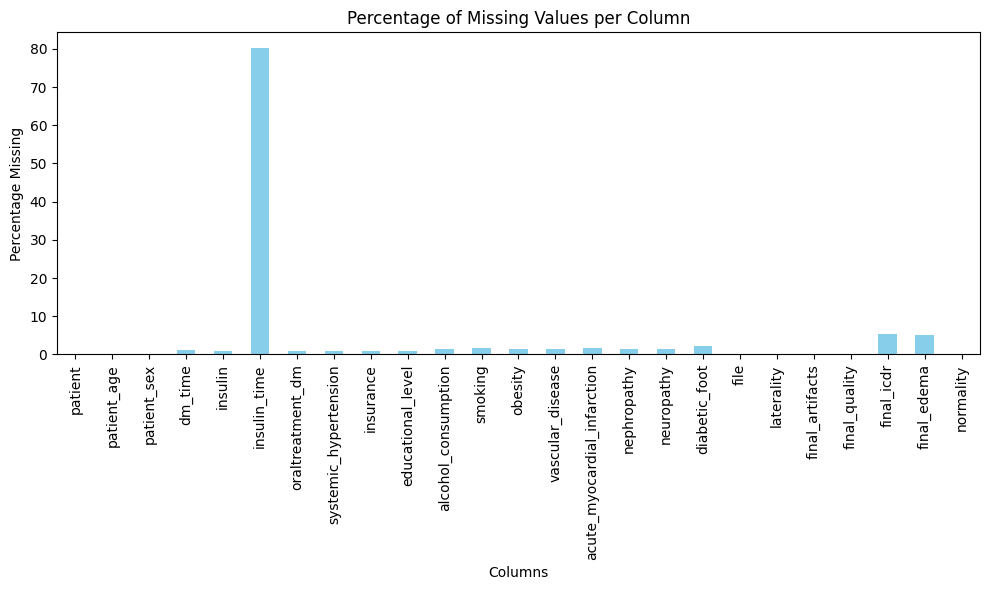

In [5]:
show_missing(df)

#### Duplicate rows

In [6]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


#### Numeric Data

##########################################################################################
########################################  Age  ########################################
##########################################################################################
count    5164.000000
mean       61.415182
std        11.529059
min         3.000000
25%        55.000000
50%        63.000000
75%        69.000000
max        90.000000
Name: patient_age, dtype: float64



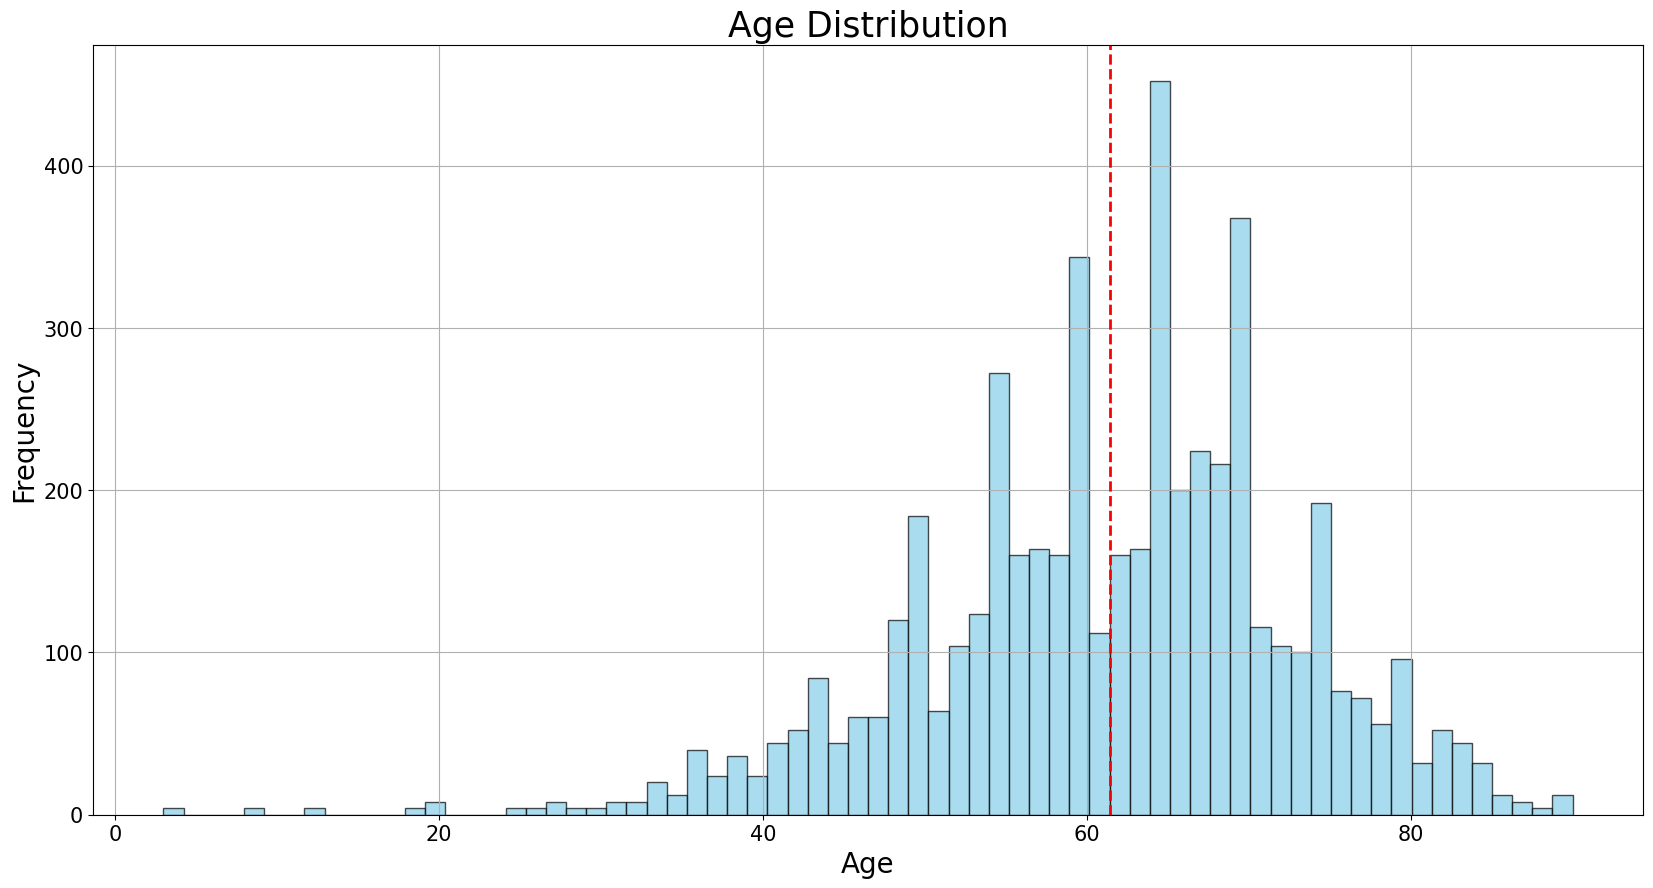

In [7]:
df['patient_age'] = df['patient_age'].str.extract('(\\d+)')

df['patient_age'] = df['patient_age'].astype('int')

plot_continuous(df, 'patient_age')

### Categorical columns distributions

In [8]:
# Explore unique values in categorical columns
#N = 10
#plot_categorical_columns(df, n=N)

##########################################################################################
########################################  patient_sex  ########################################
##########################################################################################
patient_sex
Female    0.650658
Male      0.349342
Name: proportion, dtype: float64



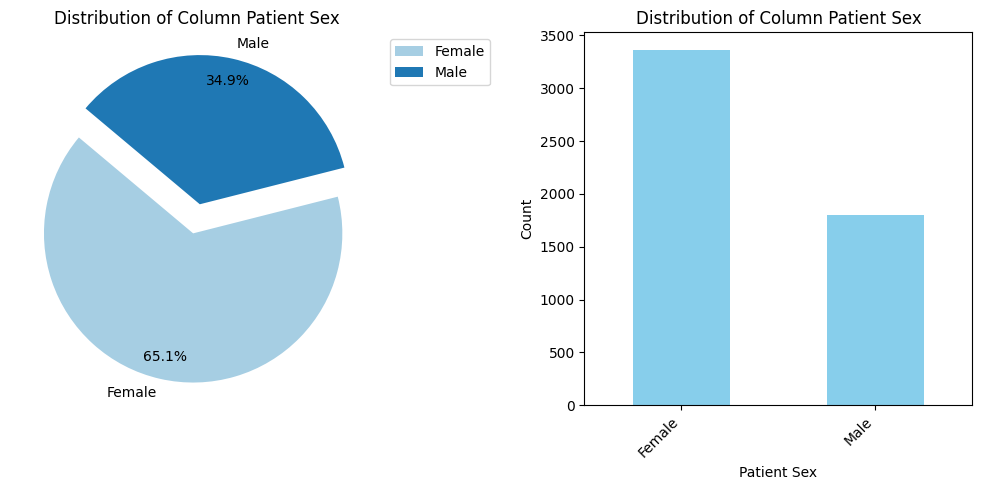

In [29]:

categorical_columns = ['patient_sex']
df['patient_sex'] = df['patient_sex'].replace({1: 'Male', 0: 'Female'})
plot_categorical_columns(df, categorical_columns=categorical_columns, save=True)

#### Image quality

##########################################################################################
########################################  final_artifacts  ########################################
##########################################################################################
final_artifacts
yes    0.827266
no     0.172734
Name: proportion, dtype: float64



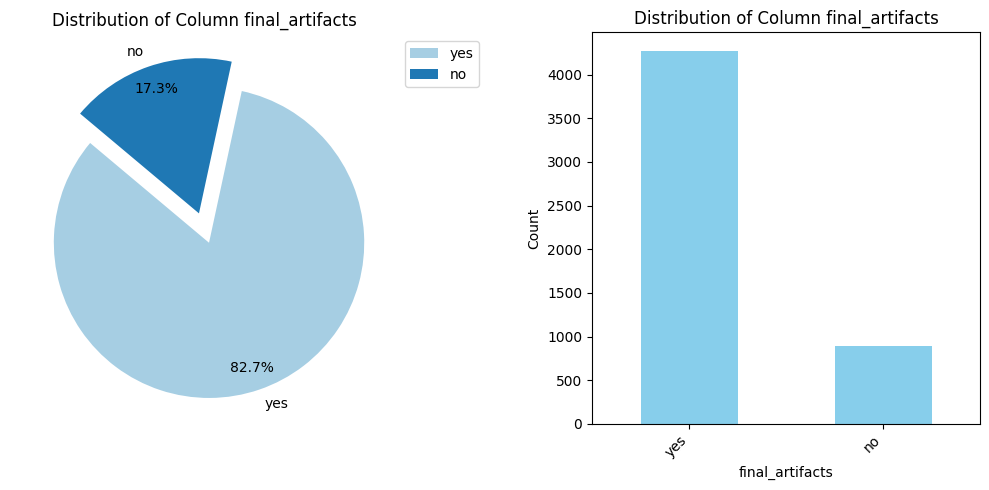

In [10]:
# categorical_columns = ['focus', 'iluminaton', 'image_field', 'artifacts'] There is no focus or ilumination column
categorical_columns = ['final_artifacts']
plot_categorical_columns(df, categorical_columns=categorical_columns, save=True)

#### Anatomical parameters

##########################################################################################
########################################  laterality  ########################################
##########################################################################################
laterality
left     0.500387
right    0.499613
Name: proportion, dtype: float64



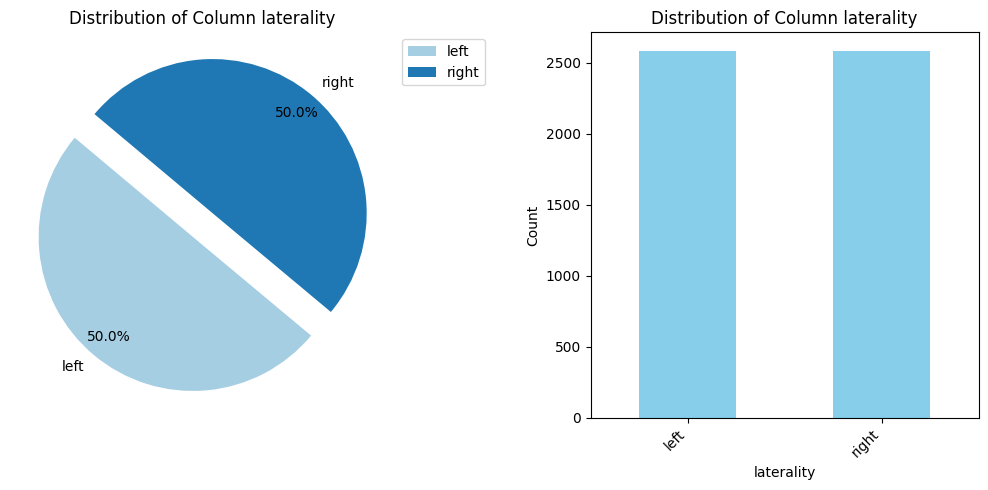

##########################################################################################
########################################  vascular_disease  ########################################
##########################################################################################
vascular_disease
0.0    0.829403
1.0    0.170597
Name: proportion, dtype: float64



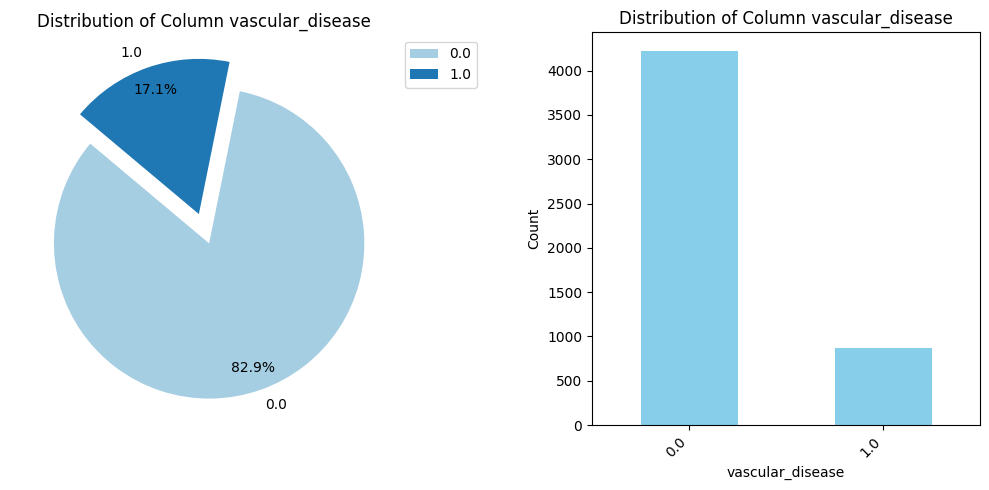

##########################################################################################
########################################  final_edema  ########################################
##########################################################################################
final_edema
no     0.912839
yes    0.087161
Name: proportion, dtype: float64



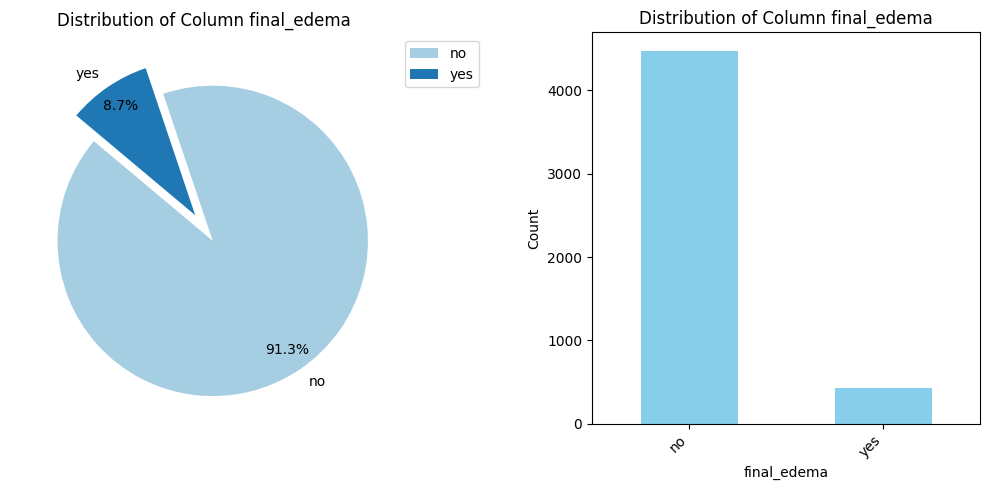

In [11]:
categorical_columns = ['laterality', 'vascular_disease', 'final_edema'] # optic_disc = laterality, vessels = vascular_disease, macula = final_edema
plot_categorical_columns(df, categorical_columns=categorical_columns)

#### Diagnoses

##########################################################################################
########################################  final_artifacts  ########################################
##########################################################################################
final_artifacts
yes    0.827266
no     0.172734
Name: proportion, dtype: float64



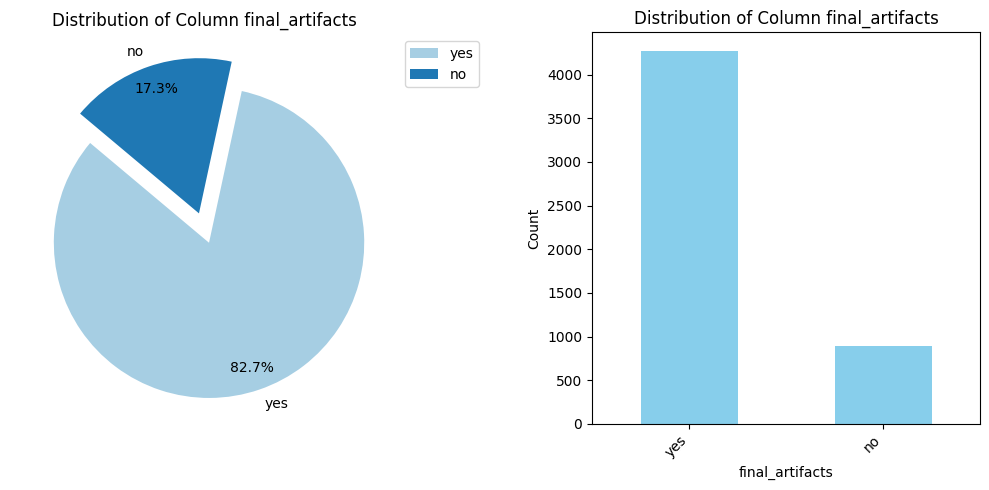

##########################################################################################
########################################  final_quality  ########################################
##########################################################################################
final_quality
yes    0.943455
no     0.056545
Name: proportion, dtype: float64



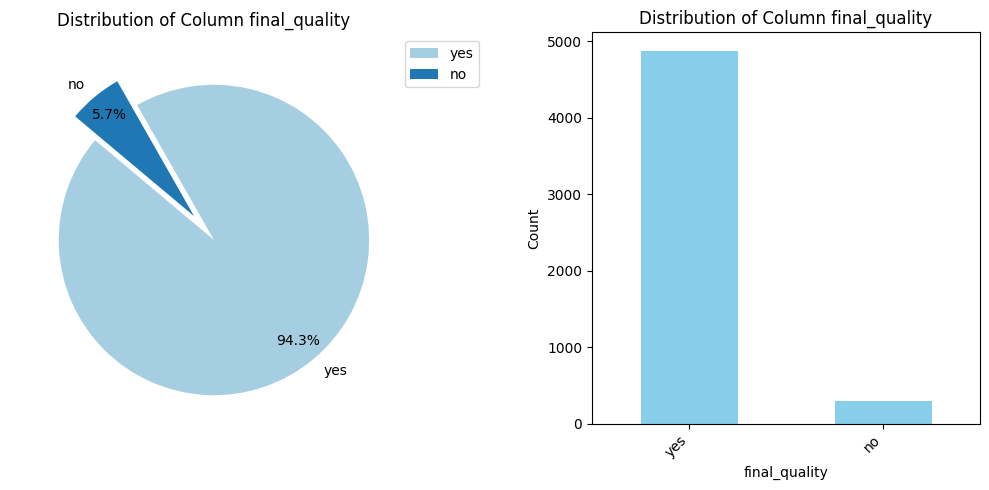

##########################################################################################
########################################  final_icdr  ########################################
##########################################################################################
final_icdr
0.0    0.767813
2.0    0.116298
1.0    0.055692
4.0    0.043407
3.0    0.016790
Name: proportion, dtype: float64



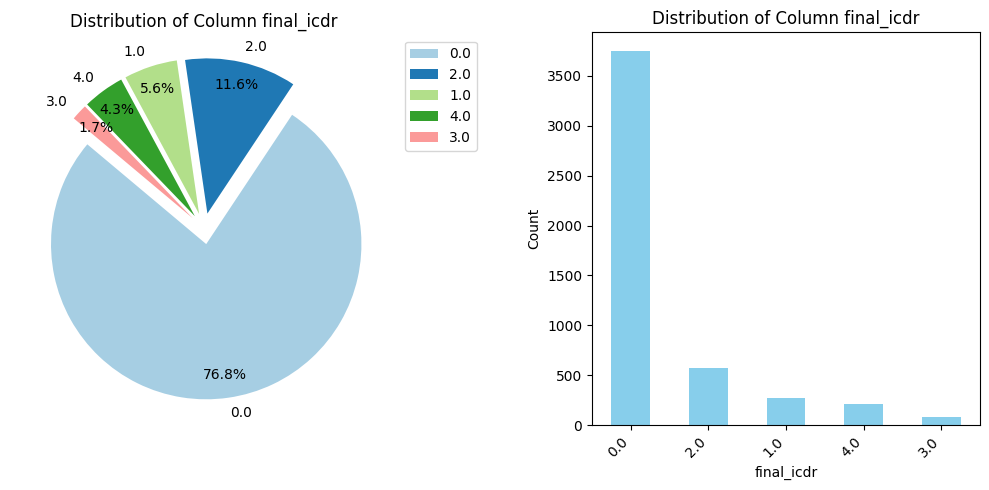

##########################################################################################
########################################  final_edema  ########################################
##########################################################################################
final_edema
no     0.912839
yes    0.087161
Name: proportion, dtype: float64



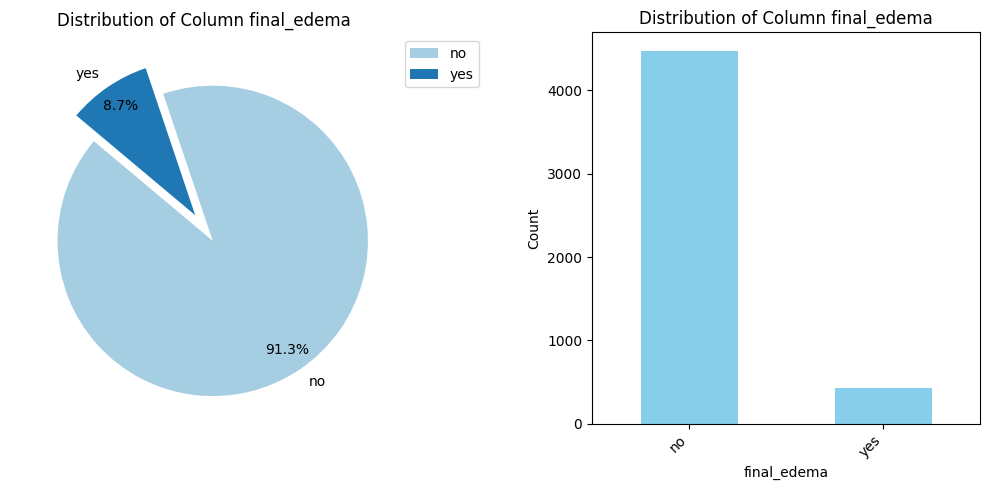

##########################################################################################
########################################  normality  ########################################
##########################################################################################
normality
abnormal    1.0
Name: proportion, dtype: float64



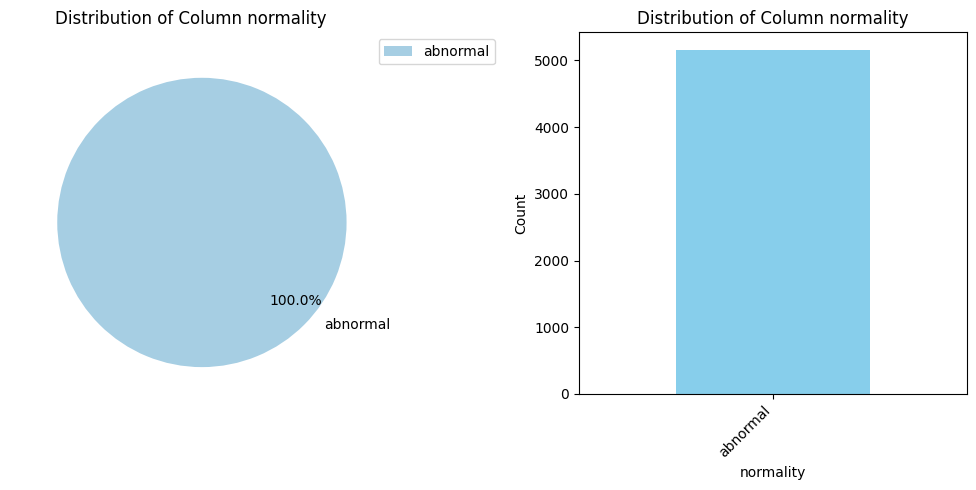

In [12]:
# Diagnoses
categorical_columns = [col for col in df.columns[20:33]]

plot_categorical_columns(df, categorical_columns=categorical_columns, save=True)

##########################################################################################
########################################  normality  ########################################
##########################################################################################
normality
abnormal    1.0
Name: proportion, dtype: float64



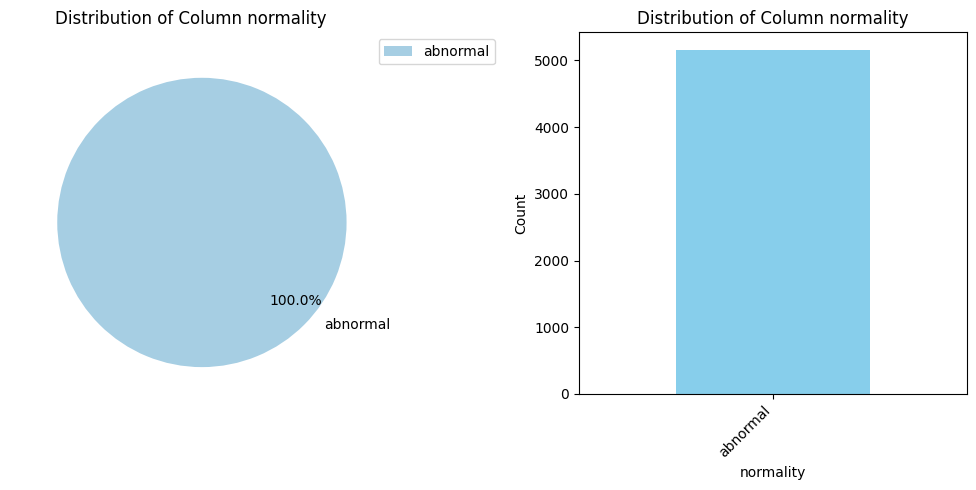

In [13]:
# Normal patients according to pathological classification
plot_categorical_columns(df, categorical_columns=['normality'])

##########################################################################################
########################################  acute_myocardial_infarction  ########################################
##########################################################################################
acute_myocardial_infarction
0.0    0.922835
1.0    0.077165
Name: proportion, dtype: float64



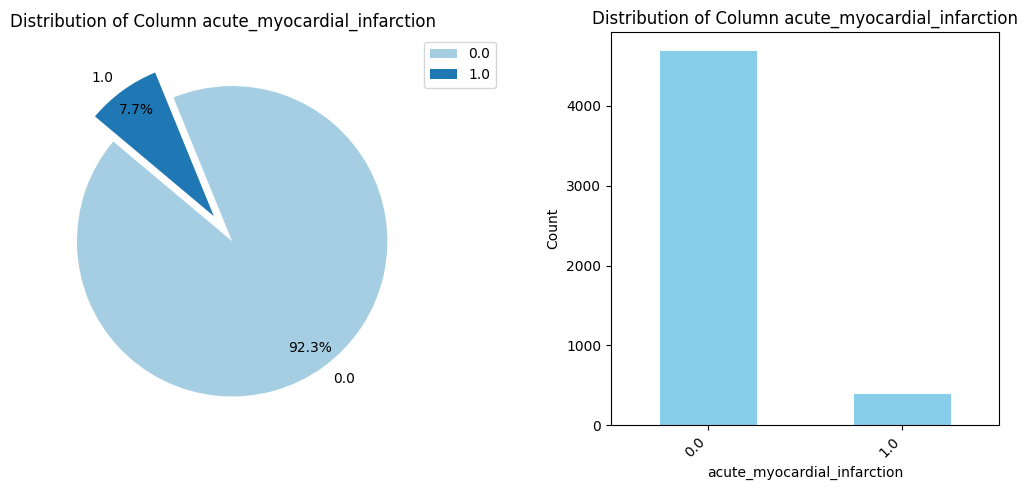

##########################################################################################
########################################  nephropathy  ########################################
##########################################################################################
nephropathy
0.0    0.963808
1.0    0.036192
Name: proportion, dtype: float64



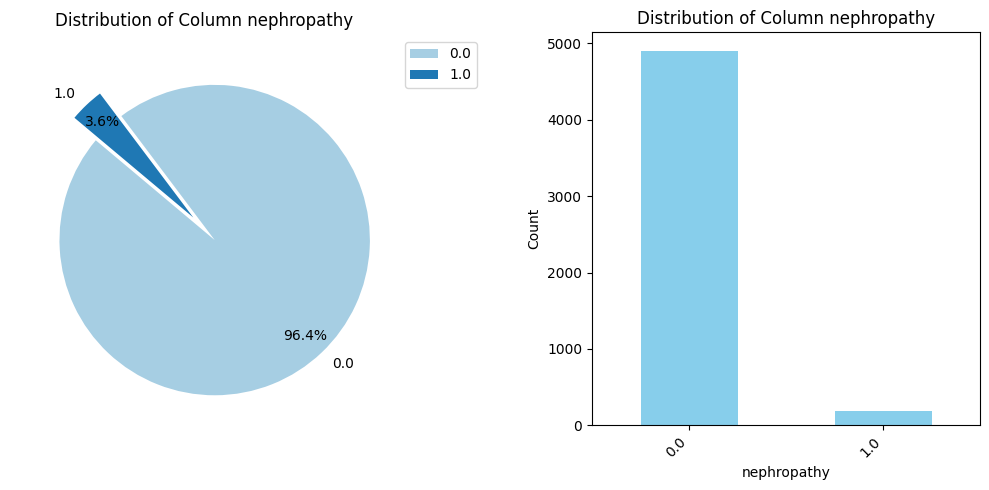

In [14]:
# Quality Parameters
categorical_columns = [col for col in df.columns[14:16]]
plot_categorical_columns(df, categorical_columns=categorical_columns)

### Create the variable referable DR

In [15]:
df['referable_dr'] = df.apply(lambda row: 'yes' if (row['final_icdr'] > 1 or (row['final_edema'] == 1)) else 'no', axis=1)

##########################################################################################
########################################  referable_dr  ########################################
##########################################################################################
referable_dr
no     0.833075
yes    0.166925
Name: proportion, dtype: float64



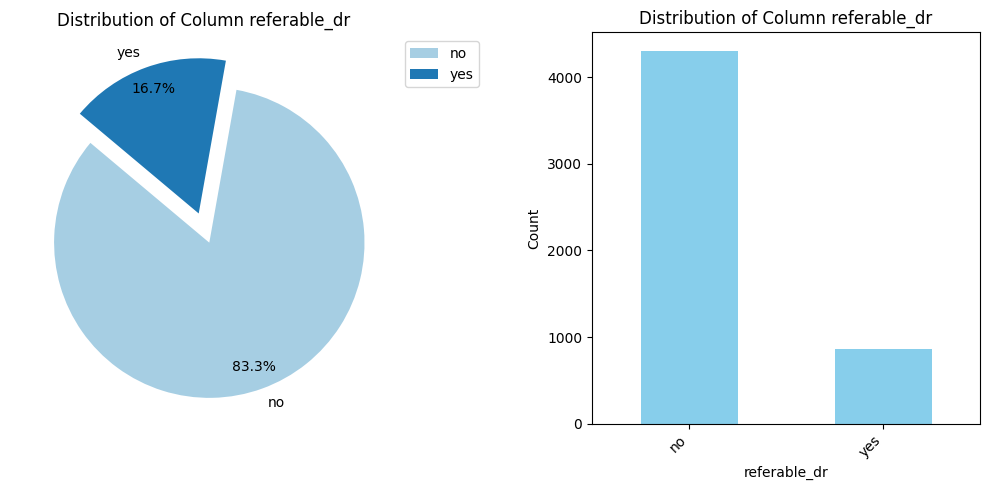

In [16]:
categorical_columns = ['referable_dr']
plot_categorical_columns(df, categorical_columns=categorical_columns, save=True)

### Diabetes patients

In [17]:
diabeticos = df.loc[(df['dm_time'] > 0)] # removed df['diabetes' == yes] because 'diabetes' is not a column

##########################################################################################
########################################  Age  ########################################
##########################################################################################
count    5016.000000
mean       61.517544
std        11.464040
min         3.000000
25%        55.000000
50%        63.000000
75%        69.000000
max        90.000000
Name: patient_age, dtype: float64



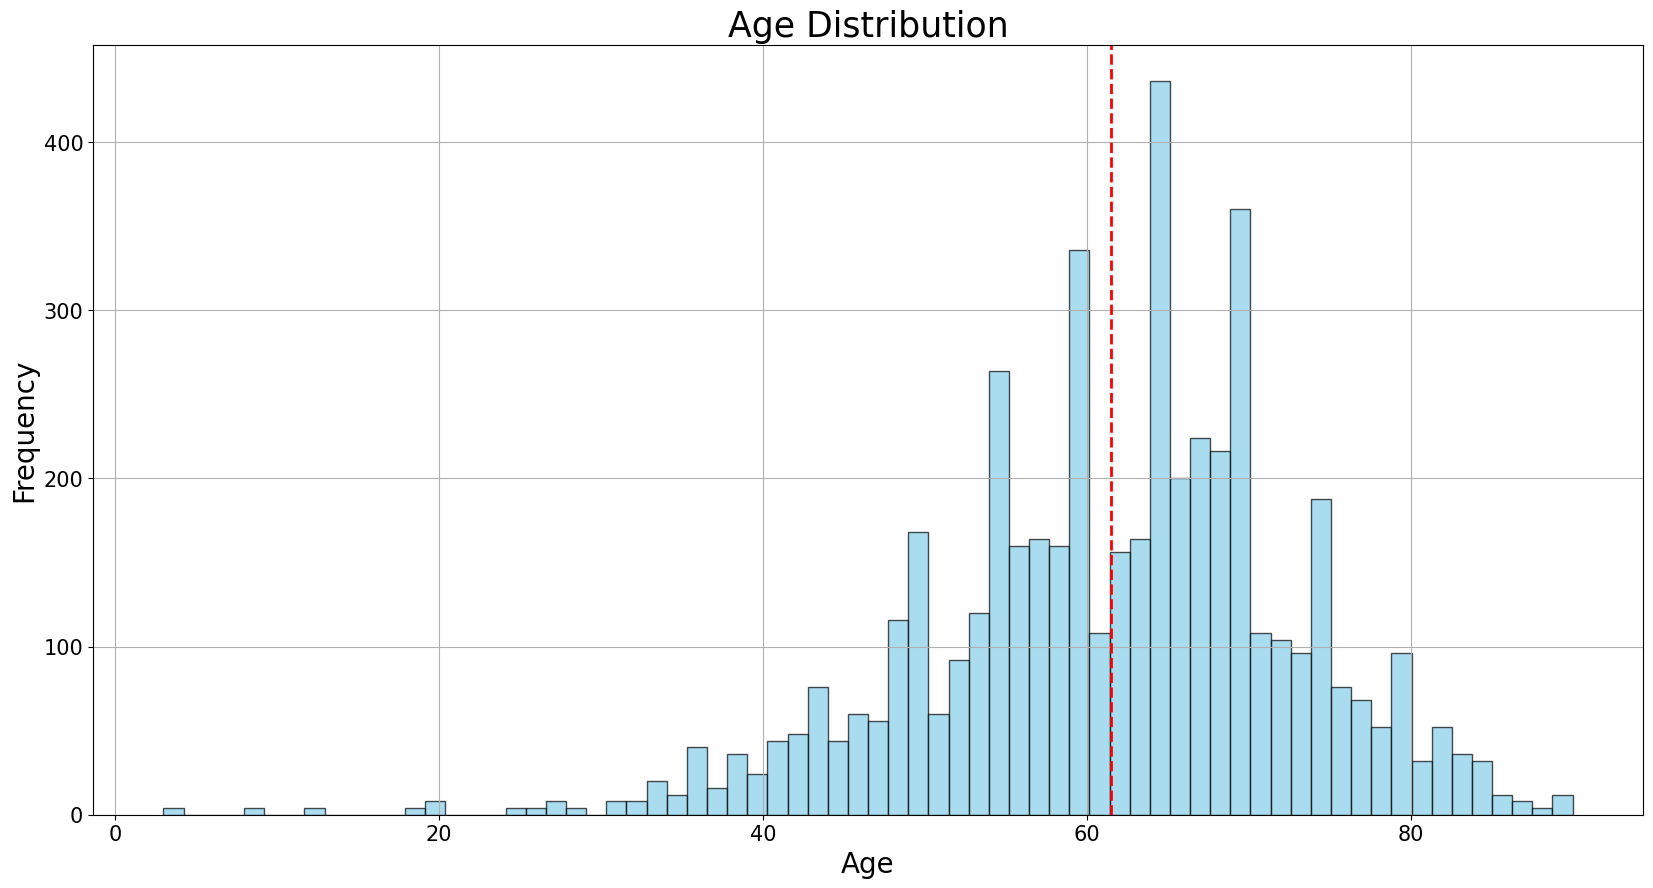

In [18]:
plot_continuous(diabeticos, 'patient_age')

##########################################################################################
########################################  acute_myocardial_infarction  ########################################
##########################################################################################
acute_myocardial_infarction
0.0    0.922141
1.0    0.077859
Name: proportion, dtype: float64



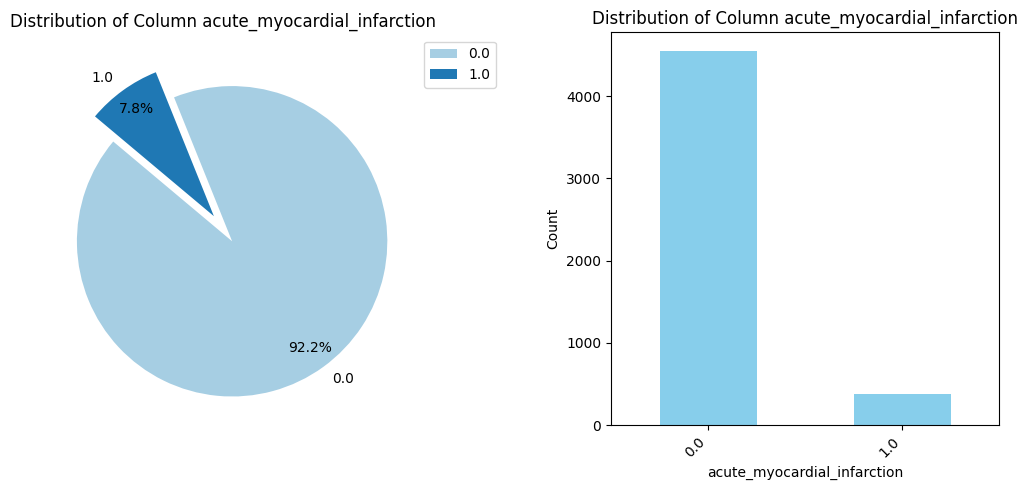

##########################################################################################
########################################  nephropathy  ########################################
##########################################################################################
nephropathy
0.0    0.964344
1.0    0.035656
Name: proportion, dtype: float64



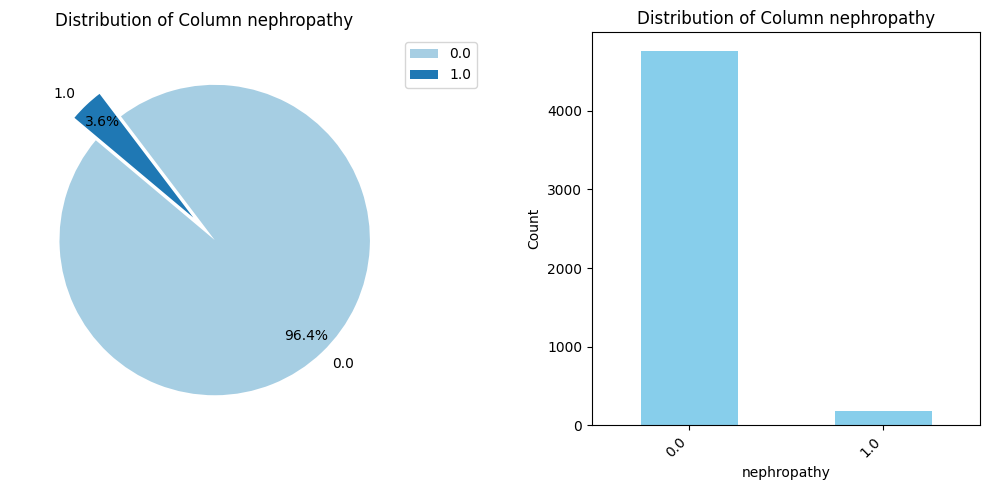

In [19]:
# Quality Parameters
categorical_columns = [col for col in diabeticos.columns[14:16]]
plot_categorical_columns(diabeticos, categorical_columns=categorical_columns)

## Images

### Show examples in different classifications

loading csv file in data/labels.csv
ROW 0 
COLUMN 0
ROW 0 
COLUMN 1
ROW 0 
COLUMN 2
ROW 1 
COLUMN 0
ROW 1 
COLUMN 1
ROW 1 
COLUMN 2
ROW 2 
COLUMN 0


IndexError: index 2 is out of bounds for axis 0 with size 2

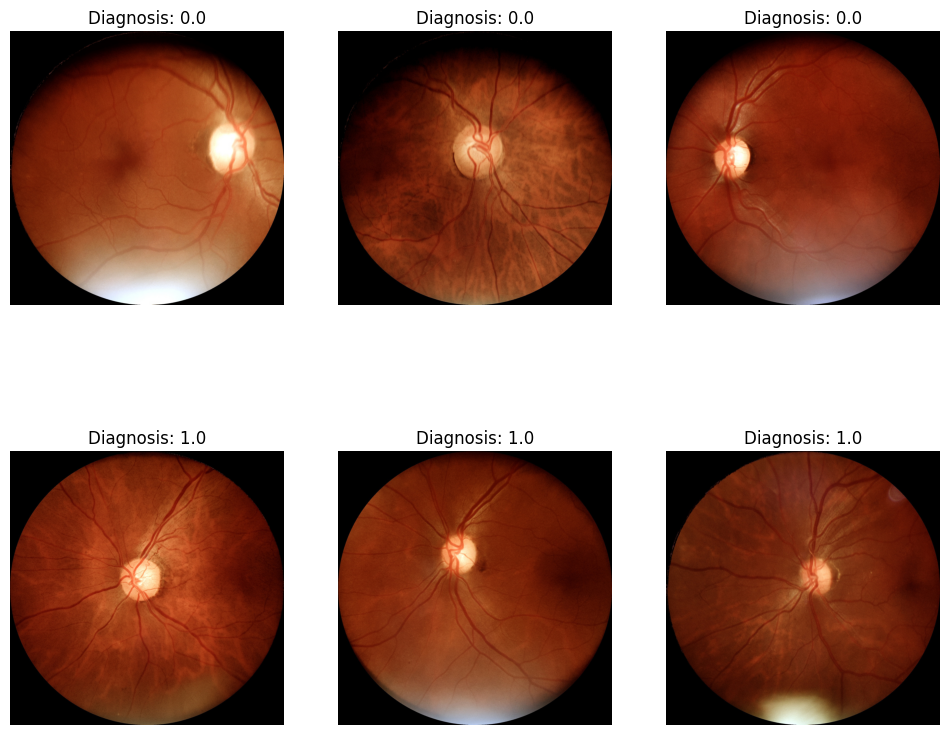

In [22]:
dataset_dir = 'data'
image_folder = 'images/'
id_column = 'file' # the names is actually 'image id' but oh well
class_column = 'final_icdr'
max_images_per_class = 3

#show_random_images(dataset_dir, image_folder, id_column, class_column, max_images_per_class)
show_random_images(dataset_dir, image_folder, id_column, class_column, max_images_per_class)

#### Images EDA

In [24]:
image_directory = os.path.join(dataset_dir, image_folder)
image_stats_df = get_image_statistics_df(image_directory)

Image #0...
Image #1000...
Image #2000...
Image #3000...
Image #4000...
Image #5000...


Statistics: 
       Height   Width       Mean_R       Mean_G       Mean_B
count  5164.0  5164.0  5164.000000  5164.000000  5164.000000
mean   1600.0  1600.0    34.084798    57.517940   119.638282
std       0.0     0.0    20.561819    23.673468    27.732458
min    1600.0  1600.0     1.286845     5.482676    35.369103
25%    1600.0  1600.0    18.793640    40.105933    99.736167
50%    1600.0  1600.0    30.206225    54.460355   118.333866
75%    1600.0  1600.0    44.617988    72.130033   138.244692
max    1600.0  1600.0   157.259893   175.866713   199.375469


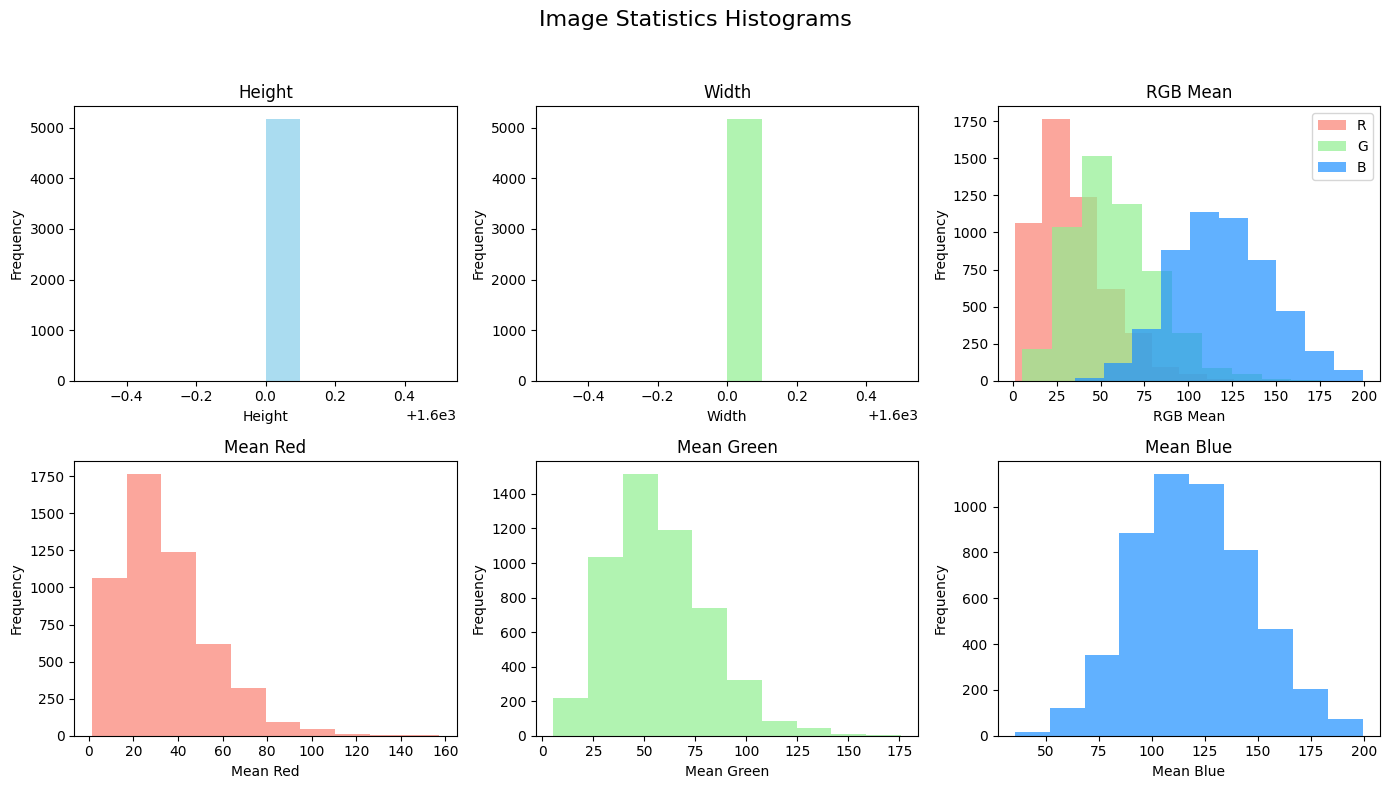

In [25]:
plot_image_statistics(image_stats_df)

In [27]:
# Define the path to the image folder
image_folder = 'data/images/'

calculate_normalization_values(image_folder)

Mean values (R, G, B): [0.469169747196917, 0.22556055656516683, 0.13366587933601623]
Standard deviation (R, G, B): [0.28130759353771817, 0.18318933563481504, 0.14929057108970556]


### Overall Profiling

In [28]:
table_name = 'Report BRSET'
out_dir = 'Profile'

# Data profiling:
# You can alsoset minimal=True for a summary:
profile = ProfileReport(df, title=f'{table_name}')

profile.to_notebook_iframe()

# save the profile:
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

profile.to_file(f'{out_dir}/{table_name}.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]